In [18]:
#Needed libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv('cerdanyola del valles 2021-01-01 to 2021-12-31.csv')
df2 = pd.read_csv('cerdanyola del valles 2022-01-01 to 2022-12-31.csv')

In [3]:
df = pd.concat([df1, df2])

In [4]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,cerdanyola del valles,2021-01-01,8.2,3.7,5.9,8.2,2.0,5.2,3.3,83.2,...,1.9,1,NaN,2021-01-01T08:18:00,2021-01-01T17:32:21,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"LEBL,D1298,08186099999,LEGE,08180099999,AR110,..."
1,cerdanyola del valles,2021-01-02,8.7,1.5,4.7,7.3,-2.1,2.6,-0.2,71.7,...,3.5,2,NaN,2021-01-02T08:18:05,2021-01-02T17:33:13,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,AR110,081840..."
2,cerdanyola del valles,2021-01-03,9.0,0.4,4.2,7.0,-2.2,2.0,-3.5,58.9,...,1.5,1,NaN,2021-01-03T08:18:07,2021-01-03T17:34:07,0.65,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,AR110,081840..."
3,cerdanyola del valles,2021-01-04,9.1,-1.9,3.5,6.5,-4.0,1.5,-1.6,71.3,...,1.9,2,NaN,2021-01-04T08:18:07,2021-01-04T17:35:02,0.69,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"LEBL,08186099999,LEGE,08180099999,AR110,081840..."
4,cerdanyola del valles,2021-01-05,8.8,-1.9,3.0,7.2,-2.8,1.6,-1.2,75.2,...,2.9,1,NaN,2021-01-05T08:18:04,2021-01-05T17:35:59,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"LEBL,08186099999,LEGE,08180099999,AR110,081840..."


In [5]:
df1['datetime'] = pd.to_datetime(df1['datetime']) #Convert data to datetime
df2['datetime'] = pd.to_datetime(df2['datetime']) 
df['datetime'] = pd.to_datetime(df['datetime']) 

Average temperature for the year: 16.69698630136986


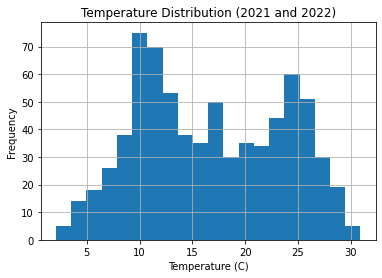

In [17]:
average_temp = df['temp'].mean()
print(f"Average temperature for the year: {average_temp}")

df["temp"].hist(bins=20)
plt.xlabel("Temperature (C)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution (2021 and 2022)")
plt.show()

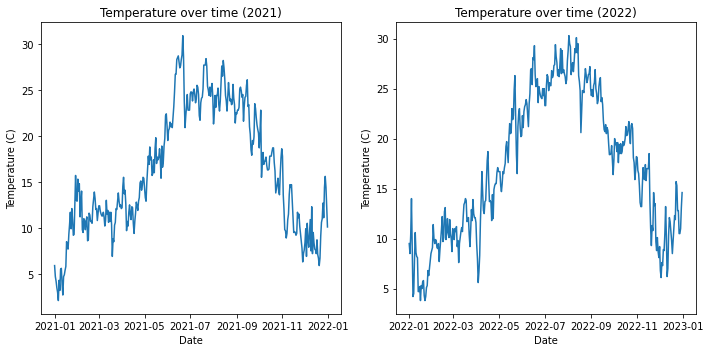

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(df1['datetime'], df1['temp'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Temperature (C)')
axs[0].set_title('Temperature over time (2021)')

axs[1].plot(df2['datetime'], df2['temp'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Temperature (C)')
axs[1].set_title('Temperature over time (2022)')

plt.tight_layout()
plt.show()

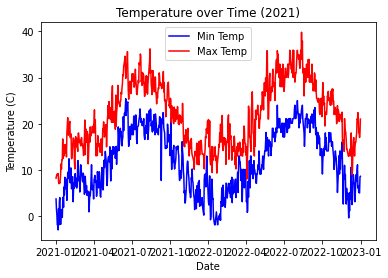

In [8]:
plt.plot(df['datetime'], df['tempmin'], color='blue', label='Min Temp')
plt.plot(df['datetime'], df['tempmax'], color='red', label='Max Temp')

plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature over Time (2021 and 2022)')

plt.legend()
plt.show()

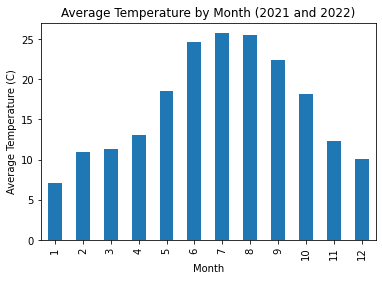

In [9]:
monthly_avg = df.groupby(df["datetime"].dt.month)["temp"].mean()
monthly_avg.plot(kind="bar")

plt.xlabel("Month")
plt.ylabel("Average Temperature (C)")
plt.title("Average Temperature by Month (2021 and 2022)")
plt.show()

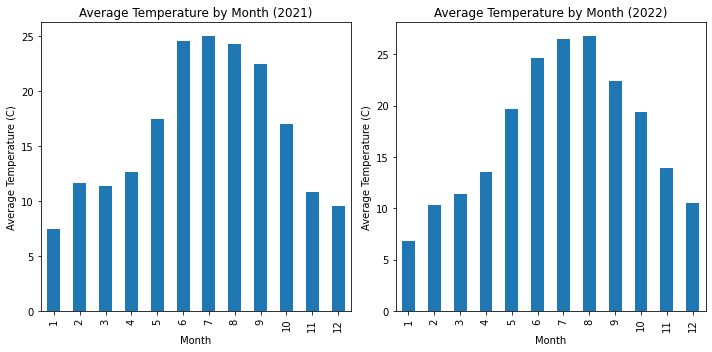

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

monthly_avg = df1.groupby(df1["datetime"].dt.month)["temp"].mean()
monthly_avg.plot(kind="bar", ax=ax1)

ax1.set_xlabel("Month")
ax1.set_ylabel("Average Temperature (C)")
ax1.set_title("Average Temperature by Month (2021)")

monthly_avg = df2.groupby(df2["datetime"].dt.month)["temp"].mean()
monthly_avg.plot(kind="bar", ax=ax2)

ax2.set_xlabel("Month")
ax2.set_ylabel("Average Temperature (C)")
ax2.set_title("Average Temperature by Month (2022)")

plt.tight_layout()
plt.show()

In [11]:
top_20_highest_temps = df.nlargest(20, 'temp')

In [12]:
top_20_highest_temps['datetime']

171   2021-06-21
213   2022-08-02
223   2022-08-12
214   2022-08-03
225   2022-08-14
195   2022-07-15
167   2022-06-17
215   2022-08-04
202   2022-07-22
221   2022-08-10
170   2021-06-20
204   2022-07-24
212   2022-08-01
165   2021-06-15
172   2021-06-22
222   2022-08-11
224   2022-08-13
164   2021-06-14
202   2021-07-22
163   2021-06-13
Name: datetime, dtype: datetime64[ns]

In [13]:
df['weekday'] = df['datetime'].dt.day_name() #Add day column
df['month'] = df['datetime'].dt.month_name()

Text(0, 0.5, 'Average Humidity (C)')

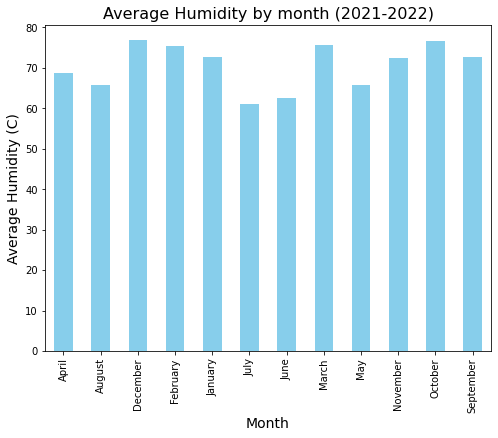

In [27]:
daily_avg = df.groupby('month')['humidity'].mean()
ax = daily_avg.plot(kind='bar', figsize=(8,6), color='skyblue')

ax.set_title('Average Humidity by month (2021-2022)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Average Humidity (C)', fontsize=14)

In [15]:
df["temp_diff"] = df["temp"] - df["feelslike"] #Add column to see difference betweeen temp and sensation

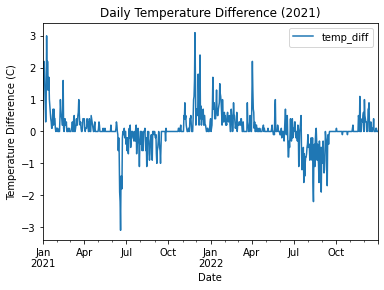

In [16]:
df.plot(x="datetime", y="temp_diff", kind="line")

plt.xlabel("Date")
plt.ylabel("Temperature Difference (C)")
plt.title("Daily Temperature Difference (2021)")
plt.show()

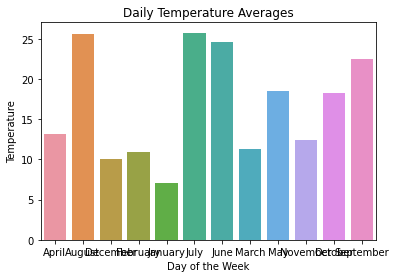

In [23]:
daily_avg = df.groupby(['month']).agg({'temp': 'mean', 'humidity': 'mean'})

# Plot a bar chart of the daily averages
sns.barplot(x=daily_avg.index, y='temp', data=daily_avg)
plt.xlabel('Day of the Week')
plt.ylabel('Temperature')
plt.title('Daily Temperature Averages')
plt.show()

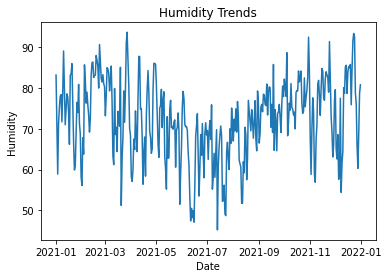

In [28]:
# Plot a line graph of the humidity over time
sns.lineplot(x='datetime', y='humidity', data=df1)
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Trends')
plt.show()

In [37]:
df['sunset'] = pd.to_datetime(df['sunset'])
df['sunrise'] = pd.to_datetime(df['sunrise'])

In [39]:
df['sunset_hour'] = df['sunset'].dt.hour #Extract the hours data
df['sunrise_hour'] = df['sunrise'].dt.hour

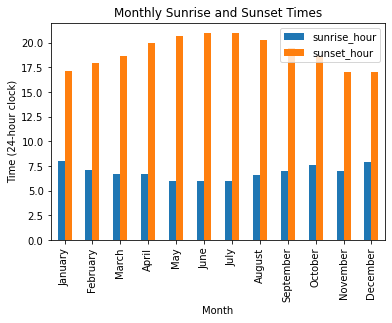

In [51]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

monthly_sun_times = df.groupby(['month']).agg({'sunrise_hour': 'mean', 'sunset_hour': 'mean'})

# Plot a bar chart of the monthly sunrise and sunset times
monthly_sun_times.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Time (24-hour clock)')
plt.title('Monthly Sunrise and Sunset Times')
plt.show()